A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


<AxesSubplot:>

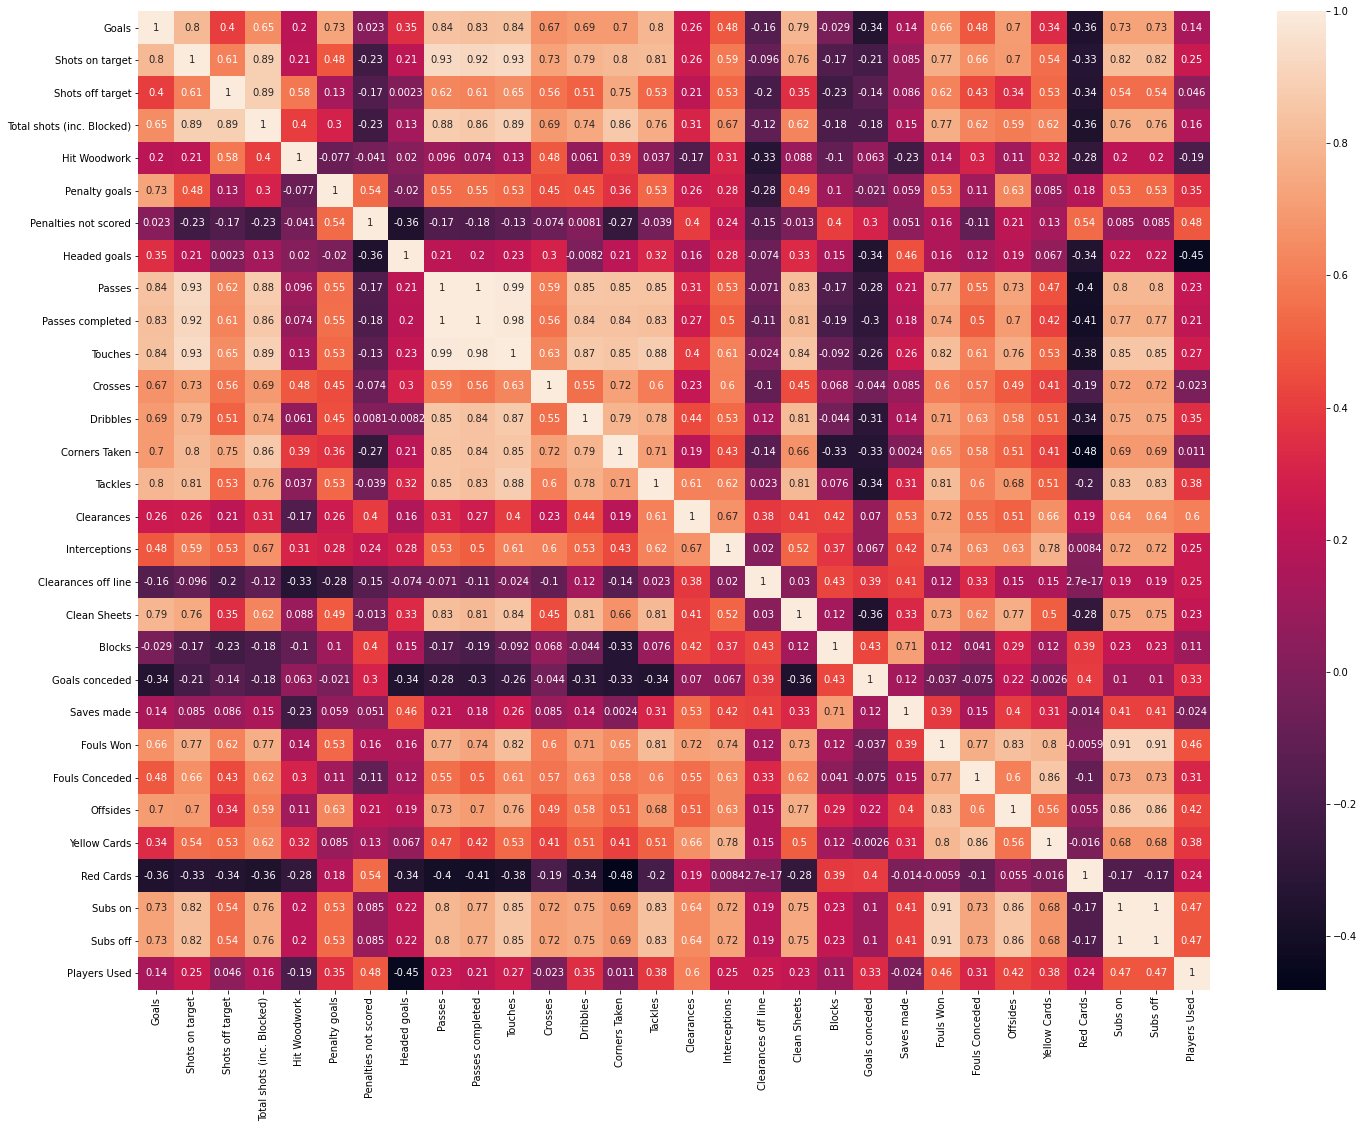

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(), annot= True)

In [4]:
for i, x in enumerate(df['Shooting Accuracy']):
    df['Shooting Accuracy'][i] = x[:-1]

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
df['Shooting Accuracy'] = df['Shooting Accuracy'].astype(float)

In [6]:
x = np.array(df['Shooting Accuracy']).reshape(-1,1)

In [7]:
y = np.array(df['Goals'])

In [8]:
polynomial_model = PolynomialFeatures(x)

In [17]:
type(x)

numpy.ndarray

In [18]:
y.shape

(16,)

In [41]:
def get_poly_scores(x,y, dataframe, degrees):
    degree = []
    train_score = []
    test_score = []
    R2_score = []
    
    for i in range(degrees[0], degrees[1] + 1):
        degree.append(i)
        poly_model = PolynomialFeatures(i)
        poly_x = poly_model.fit_transform(x, y)
        x_train, x_test, y_train, y_test = train_test_split(poly_x, y, test_size= 0.2, random_state= 42)
        lin_model = LinearRegression(n_jobs=-1)
        lin_model.fit(x_train, y_train)
        train_score.append(lin_model.score(x_train, y_train))
        y_test_predict = lin_model.predict(x_test)
        test_score.append(r2_score(y_test, y_test_predict))

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
        X_train_to_show, y_train_to_show = zip(*sorted(zip(x_train, y_train)))
        plt.scatter(X_train_to_show, y_train_to_show, color='b')
        X_train_to_show, y_pred = zip(*sorted(zip(x_train, y_test_predict)))
        plt.plot(X_train_to_show, y_pred, color='red')
        plt.scatter(X_train_to_show, y_pred, color='red')
        plt.title("Poninominal degree " + str(i))
        plt.show()
        
    dic_scores = {'degree': degree, 'train score': train_score, 'test score': test_score}
    scores_df = pd.DataFrame(dic_scores)
    return scores_df

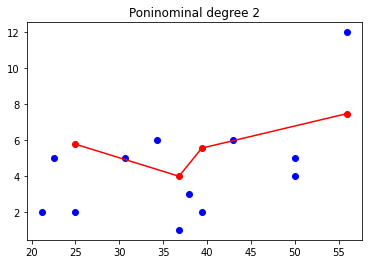

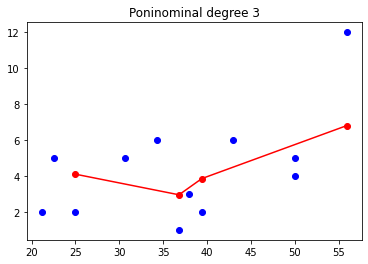

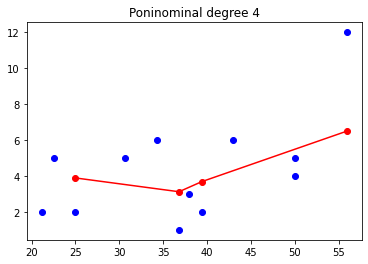

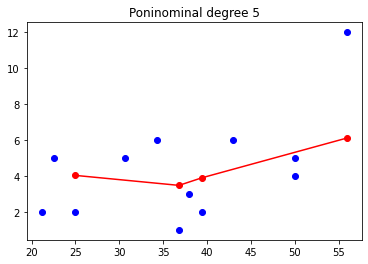

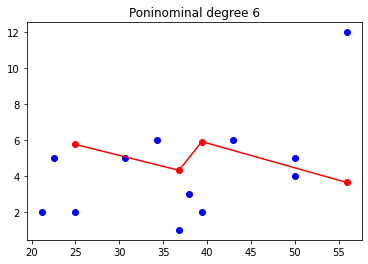

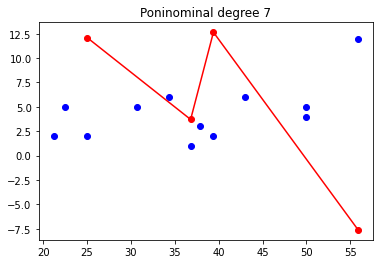

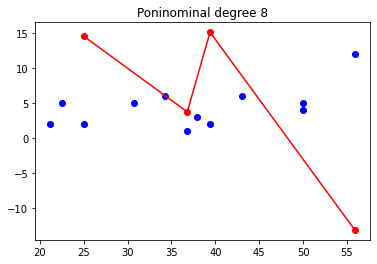

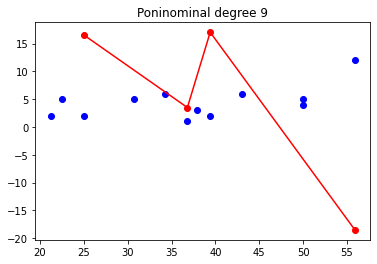

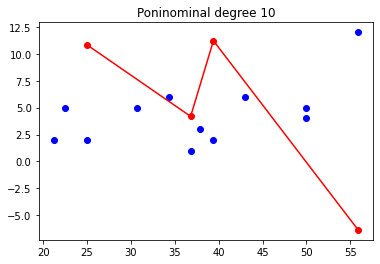

,degree,train score,test score
0,2,0.500123,-0.220921
1,3,0.671936,-0.820066
2,4,0.679875,-0.858677
3,5,0.686108,-0.677833
4,6,0.752101,0.229218
5,7,0.908451,-7.012838
6,8,0.919485,-15.792854
7,9,0.900017,-27.051922
8,10,0.841910,-4.918690


In [42]:
get_poly_scores(x= x,y= y, dataframe=df, degrees=(2, 10))